[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya/DataLiteracy/blob/master/Intro_NPL.ipynb)

#Introducción a NPL

Se presenta una breve introducción al uso de Python y algunas bibliotecas para el procesamiento de texto.

Por:

Ferney Amaya Fernández <br>
https://ferneyoamaya.github.io/ <br><br>

Contenido:
1. Definición de bibliotecas.
2. Carga de texto.
3. Pre-procesamiento.
4. Representación: Bolsa de palabras.
5. Gráficas.

## 1. Definición de bibliotecas

In [1]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 2. Carga de texto

In [2]:
text = """2020/01 spaCy is an open-source software library for advanced natural 
        language processing, written in the programming languages Python and Cython. 
        The library is published under the MIT license and its main developers are Matthew 
        Honnibal and Ines Montani, the founders of the software company Explosion."""

## 3. Pre-procesamiento

In [3]:
#Pre-processing - Filtering
text_filtered = re.sub("[^a-zA-Z]", " ", text)
text_filtered = re.sub("\d+", "", text_filtered) #drop only numbers
text_filtered = re.sub(r'\s+', ' ', text_filtered) #drop extra spaces

#Pre-processing - Tokenizer
or_len = len(text.split())
pre_len = len(text_filtered.split())

print('Texto original de %d palabras' % or_len)
print('Texto pre-procesado de %d palabras' % pre_len)

Texto original de 45 palabras
Texto pre-procesado de 45 palabras


## 4. Representación: Bolsa de Palabras

In [4]:
#Pre-processing - Filter - Stopwords
#Representation - Bag of words
wc = {}
for word in text_filtered.split():
  if word not in wc:
    wc[word] = 1
  else:
    wc[word] += 1
wc

{'Cython': 1,
 'Explosion': 1,
 'Honnibal': 1,
 'Ines': 1,
 'MIT': 1,
 'Matthew': 1,
 'Montani': 1,
 'Python': 1,
 'The': 1,
 'advanced': 1,
 'an': 1,
 'and': 3,
 'are': 1,
 'company': 1,
 'developers': 1,
 'for': 1,
 'founders': 1,
 'in': 1,
 'is': 2,
 'its': 1,
 'language': 1,
 'languages': 1,
 'library': 2,
 'license': 1,
 'main': 1,
 'natural': 1,
 'of': 1,
 'open': 1,
 'processing': 1,
 'programming': 1,
 'published': 1,
 'software': 2,
 'source': 1,
 'spaCy': 1,
 'the': 4,
 'under': 1,
 'written': 1}

## 5. Gráficas

In [5]:
l1 = list(wc.keys())
l2 = list(wc.values())
lo = []
for k in range(len(l1)):
  lo.append([l1[k], l2[k]])
lo.sort(key=lambda x:x[1])
wd = []
vl = []
for k in range(len(lo)):
  wd.append(lo[k][0])
  vl.append(lo[k][1])

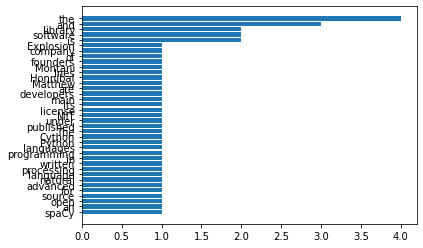

In [6]:
#Barplot
#plt.barh(list(wc.keys()), list(wc.values()))
plt.barh(wd, vl)
plt.show()

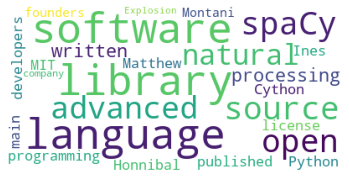

In [7]:
#Wordcloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(text_filtered)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()